In [1]:
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [75]:
model=Sequential()

In [4]:
import pandas as pd

In [46]:
X=pd.read_csv("Logistic_X_Train.csv")
Y=pd.read_csv("Logistic_Y_Train.csv")

In [6]:
X

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236
...,...,...
2245,1.694862,0.031078
2246,-0.015928,-0.145282
2247,0.441794,-0.387912
2248,0.219570,-0.117130


In [7]:
Y

,label
0,0
1,0
2,1
3,0
4,1
...,...
2245,1
2246,1
2247,1
2248,1


In [77]:
model.add(Dense(64,activation='relu',input_dim=2))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 10        
Total params: 462
Trainable params: 462
Non-trainable params: 0
_________________________________________________________________


In [38]:
a=np.array([1,2,1,3])

In [9]:
import numpy as np

In [16]:
a

array([[0.5, 0.5],
       [0.2, 0.8],
       [0.8, 0.2]])

In [12]:
from keras.utils import to_categorical

In [39]:
b=to_categorical(a)

In [ ]:
b=to_categorical

In [40]:
b

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [48]:
X=np.array(X)

In [49]:
Y=np.array(Y)

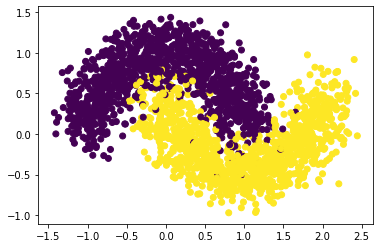

In [53]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0])
plt.show()

In [54]:
Y[:,0].shape

(2250,)

In [63]:
YOHT=to_categorical(Y)

In [64]:
YOHT.shape

(2250, 2)

In [65]:
YOHT

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [88]:
hist=model.fit(X,YOHT,epochs=100,validation_split=0.2)

Train on 1800 samples, validate on 450 samples
Epoch 1/100
1800/1800 [==============================] - 0s 72us/step - loss: 0.0919 - accuracy: 0.9678 - val_loss: 0.0843 - val_accuracy: 0.9689
Epoch 2/100
1800/1800 [==============================] - 0s 78us/step - loss: 0.0924 - accuracy: 0.9650 - val_loss: 0.0839 - val_accuracy: 0.9689
Epoch 3/100
1800/1800 [==============================] - 0s 78us/step - loss: 0.0934 - accuracy: 0.9672 - val_loss: 0.0853 - val_accuracy: 0.9711
Epoch 4/100
1800/1800 [==============================] - 0s 79us/step - loss: 0.0924 - accuracy: 0.9661 - val_loss: 0.0854 - val_accuracy: 0.9711
Epoch 5/100
1800/1800 [==============================] - 0s 79us/step - loss: 0.0918 - accuracy: 0.9672 - val_loss: 0.0836 - val_accuracy: 0.9711
Epoch 6/100
1800/1800 [==============================] - 0s 78us/step - loss: 0.0933 - accuracy: 0.9639 - val_loss: 0.0911 - val_accuracy: 0.9644
Epoch 7/100
1800/1800 [==============================] - 0s 77us/step - loss:

In [84]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

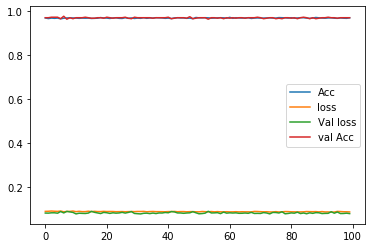

In [89]:
train_acc=hist.history["accuracy"]
train_loss=hist.history["loss"]
val_loss=hist.history["val_loss"]
val_acc=hist.history["val_accuracy"]

plt.plot(train_acc,label="Acc")
plt.plot(train_loss,label="loss")
plt.plot(val_loss,label="Val loss")
plt.plot(val_acc,label="val Acc")

plt.legend()
plt.show()

In [91]:
model.evaluate(X,YOHT)

2250/2250 [==============================] - 0s 29us/step


[0.08680230922169156, 0.967555582523346]

In [92]:
X_test=pd.read_csv("Logistic_X_Test.csv")

In [94]:
X_test.shape

(750, 2)

In [98]:
pred=np.argmax(model.predict(X_test),axis=1)

In [101]:
pred.shape

(750,)

In [102]:
pred=pd.DataFrame(pred,columns=["label"])

In [103]:
pred

,label
0,0
1,0
2,1
3,0
4,1
...,...
745,0
746,1
747,0
748,0


In [105]:
pred.to_csv("pred.csv",index=False)